In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_tool import DRN
DRN = DRN(propagation_model='INJ.BRK', init_particles = ['DM Antiprotons', 'Secondary Antiprotons', 'DM Antideuterons', 'Secondary Antideuterons'])


DRN Info: The simulation tool has been initiated.



**First Example: Antiproton fluxes**

In [2]:
# Initialize parameters for simulation inputs

test_mDM = 10

test_fs = np.ones(8)* 1/8 #equal branching fractions

test_coalescence = np.array([1, 210]) # Lambda_b = 1, p_c = 210 MeV

test_pp = DRN.create_INJ_BRK_parameters(N_identical=1)

In [3]:
# Extract the desired output spectra and plot them for one DM mass

out = DRN.predict(["DM Antideuterons", "Secondary Antideuterons"], test_pp, DM_mass= test_mDM, DM_fs = test_fs, coalescence_parameters = test_coalescence)

DM_flux, DM_E = out[0]
S_flux, S_E = out[1]


DRN Info: No value was given for the annihilation cross section. It will be set to default (<sigma v> = 3 * 10^-26 cm^3 s^-1).
1/1 [==============================] - 0s 238ms/step


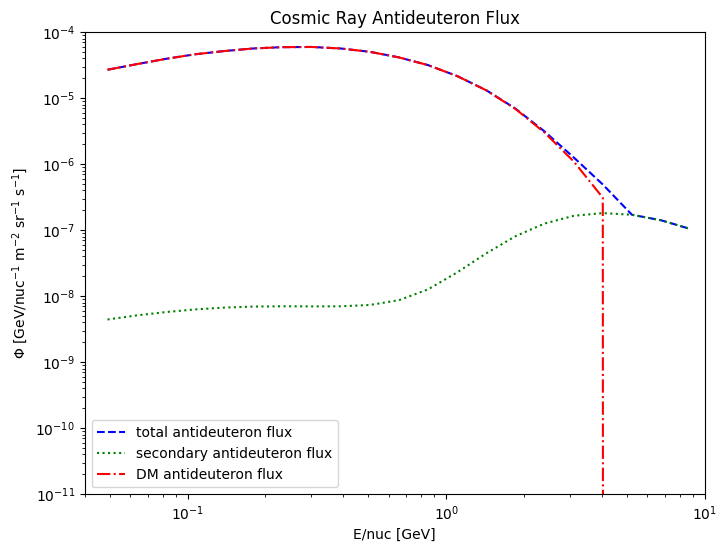

In [4]:
plt.figure(figsize=(8,6))
plt.title('Cosmic Ray Antideuteron Flux')
plt.plot(DM_E, (DM_flux + S_flux), c = 'b', linestyle = 'dashed', label = 'total antideuteron flux')
plt.plot(S_E, S_flux, c = 'g', linestyle = 'dotted', label = 'secondary antideuteron flux')
plt.plot(DM_E[DM_E<test_mDM], (DM_flux)[DM_E<test_mDM], c = 'r', linestyle = 'dashdot', label = 'DM antideuteron flux')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(4e-2, 1e1)
plt.ylim(1e-11, 1e-4)
plt.ylabel('$\Phi$ [GeV/nuc$^{-1}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E/nuc [GeV]')
plt.show()

**Second Example: Different Dark Matter Masses** 

In [5]:
# Initialize parameters for simulation inputs

test_mDM = np.array([10, 100])

test_fs = np.ones((2, 8))* 1e-5 # minimal branching fraction
test_fs[:,2] = 1-7e-5 # dominant annihilation channel : bb

test_coalescence = np.array([3, 210]) # Lambda_b = 3, p_c = 210 MeV
test_coalescence = np.repeat([test_coalescence], 2, axis = 0)

test_pp = np.array([1.68199568e+00, 1.70286635e+00, 6.47737735e+03, 3.86245847e-01, 2.43061120e+00, 2.38355415e+00, 3.86570662e+28, 3.96462101e-01, -1.33734944e-01, 2.46237751e+05, 4.31208425e-01, 2.01297813e+01]) # DIFF.BRK propagation model with arbitrary values
test_pp = np.repeat([test_pp], 2, axis = 0)
# Run prediction

out = DRN.predict(["DM Antideuterons"], test_pp, DM_mass= test_mDM, DM_fs = test_fs, coalescence_parameters = test_coalescence)

DM_flux, DM_E = out[0]


DRN Info: No value was given for the annihilation cross section. It will be set to default (<sigma v> = 3 * 10^-26 cm^3 s^-1).


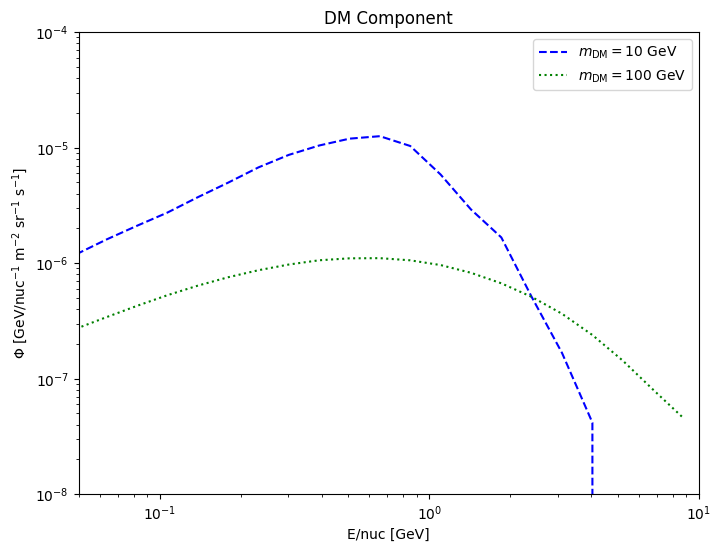

In [6]:
plt.figure(figsize=(8,6)) 
plt.title('DM Component')
plt.plot(DM_E[DM_E<test_mDM[0]], (DM_flux[0])[DM_E<test_mDM[0]], c = 'b', linestyle = 'dashed', label = r'$m_\mathrm{DM} = 10$ GeV')
plt.plot(DM_E[DM_E<test_mDM[1]], (DM_flux[1])[DM_E<test_mDM[1]], c = 'g', linestyle = 'dotted', label = r'$m_\mathrm{DM} = 100$ GeV')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi$ [GeV/nuc$^{-1}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E/nuc [GeV]')
plt.xlim(5e-2, 1e1)
plt.ylim(1e-8, 1e-4)
plt.show()

**Third Example: Varying Coalescence Parameters**

In [7]:
# Initialize parameters for simulation inputs

test_mDM = np.array([10, 10, 10])

test_fs = np.ones((3, 8))* 1e-4 # minimal branching fraction
test_fs[:,2] = 1-7e-4 # dominant annihilation channel : bb

test_coalescence = np.array([[0.5, 210], [1, 210], [10, 210]]) # Lambda_b varied, p_c = 210 MeV

test_pp = DRN.create_INJ_BRK_parameters(N_identical=3)

# Run prediction

out = DRN.predict(["DM Antideuterons"], test_pp, DM_mass= test_mDM, DM_fs = test_fs, coalescence_parameters = test_coalescence)

DM_flux, DM_E = out[0]


DRN Info: No value was given for the annihilation cross section. It will be set to default (<sigma v> = 3 * 10^-26 cm^3 s^-1).


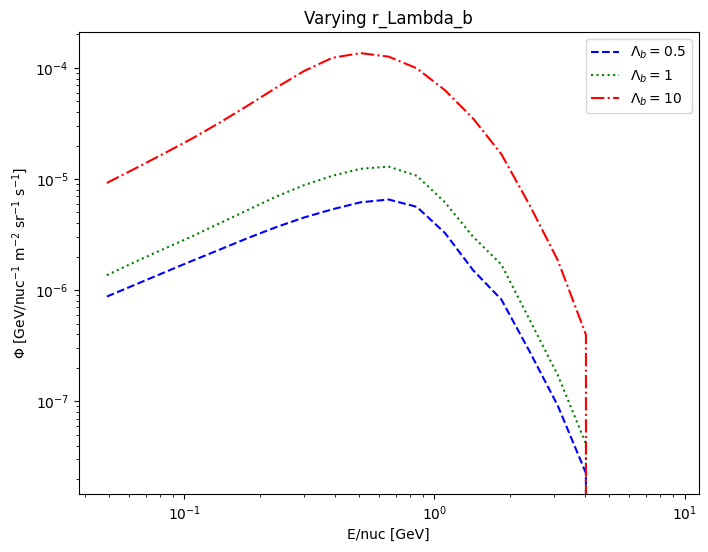

In [8]:
plt.figure(figsize=(8,6))
plt.title('Varying r_Lambda_b')
plt.plot(DM_E[DM_E<test_mDM[0]], (DM_flux[0])[DM_E<test_mDM[0]], c = 'b', linestyle = 'dashed', label = r'$\Lambda_b = 0.5$')
plt.plot(DM_E[DM_E<test_mDM[1]], (DM_flux[1])[DM_E<test_mDM[1]], c = 'g', linestyle = 'dotted', label = r'$\Lambda_b = 1$')
plt.plot(DM_E[DM_E<test_mDM[2]], (DM_flux[2])[DM_E<test_mDM[2]], c = 'r', linestyle = 'dashdot', label = r'$\Lambda_b = 10$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi$ [GeV/nuc$^{-1}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E/nuc [GeV]')
plt.show()

In [9]:
test_coalescence = np.array([[1, 150], [1, 210], [1, 300]]) # Lambda_b = 1, p_c varied

out = DRN.predict(["DM Antideuterons"], test_pp, DM_mass= test_mDM, DM_fs = test_fs, coalescence_parameters = test_coalescence)

DM_flux, DM_E = out[0]


DRN Info: No value was given for the annihilation cross section. It will be set to default (<sigma v> = 3 * 10^-26 cm^3 s^-1).


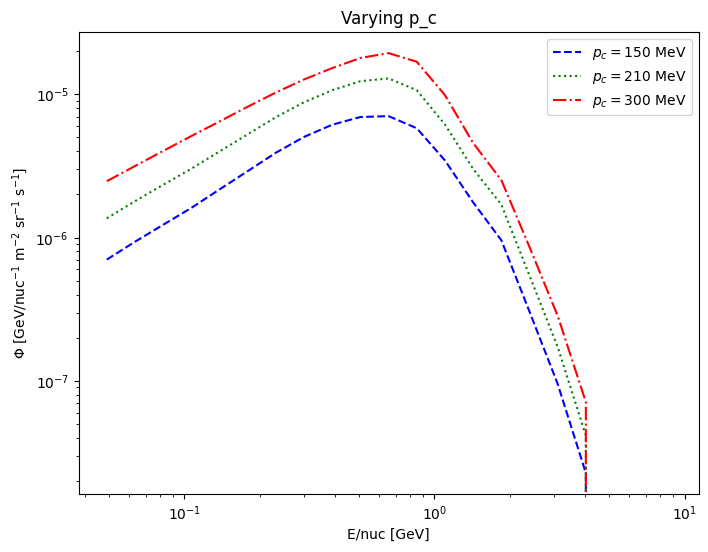

In [10]:
plt.figure(figsize=(8,6))
plt.title('Varying p_c')
plt.plot(DM_E[DM_E<test_mDM[0]], (DM_flux[0])[DM_E<test_mDM[0]], c = 'b', linestyle = 'dashed', label = r'$p_c = 150$ MeV')
plt.plot(DM_E[DM_E<test_mDM[1]], (DM_flux[1])[DM_E<test_mDM[1]], c = 'g', linestyle = 'dotted', label = r'$p_c = 210$ MeV')
plt.plot(DM_E[DM_E<test_mDM[2]], (DM_flux[2])[DM_E<test_mDM[2]], c = 'r', linestyle = 'dashdot', label = r'$p_c = 300$ MeV')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi$ [GeV/nuc$^{-1}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E/nuc [GeV]')
plt.show()